In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
from scipy.optimize import minimize
from scipy.misc import derivative
import sympy as sp

# The Laplace Approximation


This example originates from [The Laplace approximation (part 1)](https://forem.julialang.org/). The main idea is to approximation a given probability distribution by a Gaussian distribution. The example is taken from section 4.4.


This is the distribution that we want to approximate with a Gaussian distribution


In [3]:
def f(z):
    return (4 - z**2) * np.exp(-(z**2))

We use numeric integration to compute the normalization factor Z. The function f is for all practical purposes 0 outside the interval [-10, 10].


In [4]:
Z, err = quad(f, -10, 10)
Z, err

(6.203588478169306, 3.843030555460377e-12)

Normalized PDF


In [5]:
def p(z):
    return f(z) / Z

In [6]:
def log_f(z):
    return -1 * np.log(f(z))

C:\Users\carsten.jorgensen\AppData\Local\Temp\ipykernel_24144\2374474790.py:2: RuntimeWarning: divide by zero encountered in log
  return -1 * np.log(f(z))


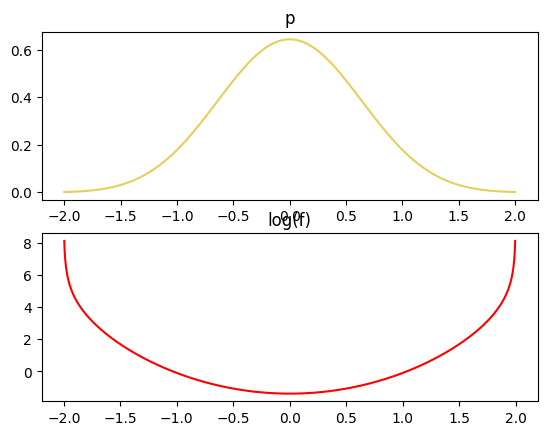

In [9]:
x = np.linspace(-2, 2, 1000)
px = p(x)
logfx = log_f(x)
fig, ax = plt.subplots(2)
ax[0].yaxis.set_ticks(np.arange(0, 1, 0.2))
ax[0].plot(x, px, color="#e5cf5c")
ax[0].set_title("p")
ax[1].plot(x, logfx, color="red")
ax[1].set_title("log(f)")

We need to find the mode of $p$ and the second derivate of $-\log(f)$. In this case the maximum of $p$ corresponds the minimum of $-\log(f)$. So we use Scipy to calculate not only the $z_0$ where the minimum of $p$ is obtained but also the Hessian (second derivate) in that point.


In [19]:
z_guess = 1.0
solution = minimize(log_f, z_guess, method="BFGS")
z_0 = solution.x
hessian = np.linalg.inv(solution.hess_inv)
z_0, hessian

(array([-1.4522287e-08]), array([[2.50001466]]))

The mean of the Gaussian approximation is $z_0$ and variance is $1/hessian$.


In [46]:
x = np.linspace(-2, 2, 1000)
fx = f(x)
q = lambda x: f(z_0[0]) * np.exp(-hessian[0][0] / 2 * (x - z_0[0]) ** 2)
qx = q(x)

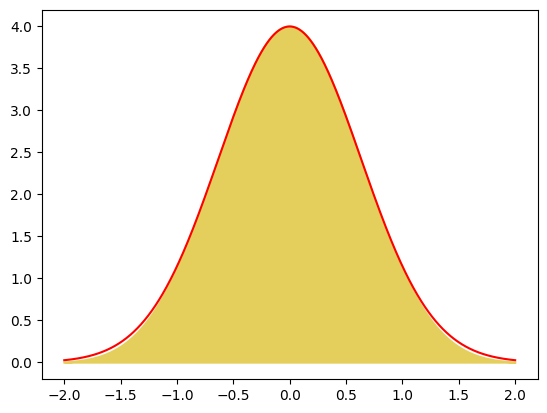

In [48]:
fig, ax = plt.subplots()
# ax.yaxis.set_ticks(np.arange(0, 1, 0.2))
ax.fill_between(x, 0, fx, color="#e5cf5c")
ax.plot(x, fx, color="#e5cf5c")
ax.plot(x, qx, color="red");

## How to determine the normalization constant Z


Using equation 4.135 from the Pattern Recognition book:


In [24]:
Z1 = f(z_0[0]) * np.sqrt(2 * np.pi) / np.sqrt(hessian[0][0])
Z1

6.341305086721463

Scipy derivative calculation:


In [25]:
d = derivative(log_f, z_0[0], dx=1e-6, n=2)
d

C:\Users\carsten.jorgensen\AppData\Local\Temp\ipykernel_24144\406683536.py:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d = derivative(log_f, z_0[0], dx=1e-6, n=2)


2.5000002068509275